In [38]:
"import numpy as np", 
import pandas as pd
import matplotlib.pyplot as plt
import re

- [ x ] Dar pontos positivos ou negativos para cada coluna da empresa
- [ x ] Rankear ações pela melhor pontuação geral
- [ ] Rankear FIIs da mesm forma
- [ ] Avaliar historicamente se investir ns top 15 desse ranking traz bons resultados
- [ ] Adicionar metricas historicas (evolucao de preco, distribuicao de dividendos, etc)
- [ ] Adicionar modelo Black & Scholes
- [ ] Adicionar fontes de dados independentes do Status Invest
- [ ] Adicionar metadados (setor da acao, vantagem competiiva, gestao boa, etc)
- [ ] !!!! Adicionar método que faz top 20 de cada coluna e dá 1 ponto pra cada carcterística TOP


In [39]:
br_stocks = pd.read_csv("acoes_brasil.csv", sep=";", decimal=",", thousands='.') #.fillna(0)
print(br_stocks.columns)
# print(br_stocks.dtypes)
br_stocks.head()

Index(['TICKER', 'PRECO', 'DY', 'P/L', 'P/VP', 'P/ATIVOS', 'MARGEM BRUTA',
       'MARGEM EBIT', 'MARG. LIQUIDA', 'P/EBIT', 'EV/EBIT',
       'DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'PSR', 'P/CAP. GIRO',
       'P. AT CIR. LIQ.', 'LIQ. CORRENTE', 'ROE', 'ROA', 'ROIC',
       'PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS', 'GIRO ATIVOS',
       'CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS', ' LIQUIDEZ MEDIA DIARIA',
       ' VPA', ' LPA', ' PEG Ratio', ' VALOR DE MERCADO'],
      dtype='object')


,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,10.41,NaN,-4.30,1.42,0.49,30.29,-1.09,-25.30,-99.75,...,0.34,0.65,0.45,0.13,NaN,1.898619e+06,7.32,-2.42,-0.01,1.231428e+09
1,ABCB4,19.86,6.07,5.71,0.83,0.08,31.62,25.25,19.35,4.38,...,0.10,0.90,0.07,18.70,12.95,1.226095e+07,23.98,3.48,0.39,4.490150e+09
2,ABEV3,12.98,5.86,14.34,2.41,1.54,49.95,21.50,17.26,11.52,...,0.64,0.35,0.62,10.72,14.46,3.329247e+08,5.40,0.91,2.64,2.047998e+11
3,ADHM3,1.56,NaN,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,NaN,NaN,NaN,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,0.81,NaN,-5.82,0.74,0.20,13.03,9.37,-3.59,2.23,...,0.27,0.73,0.93,NaN,NaN,6.355384e+06,1.10,-0.14,0.00,6.206329e+08


In [44]:
def percentage_str_to_float(x):
	# print("el: '", x, "'")
	x = re.sub(r"^\s*$", "N/A", x)
	x = x.strip("%").replace(",", ".")
	if x == "N/A":
		return None
	return float(x) / 100

converters = {}
percentage_cols = ["DIVIDEND YIELD", "DY (12M) ACUMULADO", "DY (12M) MÉDIA", "VARIAÇÃO PREÇO", "DY PATRIMONIAL", "VARIAÇÃO PATRIMONIAL"]
for col in percentage_cols:
	converters[col] = percentage_str_to_float
	# print(col, fiis_df[col].dtype)
	# fiis_df[col] = fiis_df[col].apply(percentage_str_to_float)

fiis_df = pd.read_csv("fiis.csv", sep=",", decimal=",", thousands=".", converters=converters)
fiis_df.rename({"DIVIDEND YIELD": "DY"})

# print(fiis_df.columns)
# print(fiis_df.dtypes)
fiis_df.head()

,TICKER,SETOR,LIQUIDEZ DIÁRIA (R$),P/VP,DIVIDEND YIELD,DY (12M) ACUMULADO,DY (12M) MÉDIA,VARIAÇÃO PREÇO,PATRIMÔNIO LÍQUIDO,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,QUANT. ATIVOS,NUM. COTISTAS
0,AAZQ11,INDEFINIDO,658092.68,0.96,0.0131,0.1341,0.0149,-0.0245,2.273157e+08,0.96,0.0127,0.0000,0.0,19556.0
1,ABCP11,SHOPPINGS,43186.82,0.75,0.0087,0.0914,0.0076,0.0286,4.324652e+08,0.75,0.0065,0.0002,1.0,17587.0
2,AFHI11,PAPÉIS,1179377.89,1.01,0.0107,0.1304,0.0109,0.0022,3.178651e+08,1.01,0.0110,0.0012,0.0,25035.0
3,AGRX11,OUTROS,233347.32,NaN,0.0138,0.1656,0.0138,0.0150,NaN,NaN,NaN,NaN,0.0,0.0
4,AIEC11,LAJES CORPORATIVAS,623349.32,0.59,0.0132,0.1392,0.0116,-0.1216,4.578679e+08,0.59,0.0080,0.0149,2.0,15900.0


In [41]:
points_df = pd.DataFrame()

feature_to_filter = {
	"P/L": {"min_val": 3, "max_val": 20},
	"DY": {"min_val": 5, "max_val": 20},
	"P/VP": {"min_val": 0.5, "max_val": 3},
	"MARGEM BRUTA": {"min_val": 5, "max_val": 100},
	"MARG. LIQUIDA": {"min_val": 5, "max_val": 100},
	"ROA": {"min_val": 5, "max_val": 100},
	"ROE": {"min_val": 5, "max_val": 100},
	"ROIC": {"min_val": 5, "max_val": 100},
}

filtered_br_stocks = br_stocks
for feature_name, filter_info in feature_to_filter.items():
	# step 1
	min_val = filter_info["min_val"]
	min_filter = (filtered_br_stocks[feature_name] > min_val)

	filtered_step_1 = filtered_br_stocks[min_filter]

	# step 2
	max_val = filter_info["max_val"]
	max_filter = (filtered_step_1[feature_name] < max_val)

	filtered_step_2 = filtered_step_1[max_filter]

	# end
	filtered_br_stocks = filtered_step_2

filtered_br_stocks.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
2,ABEV3,12.98,5.86,14.34,2.41,1.54,49.95,21.50,17.26,11.52,...,0.64,0.35,0.62,10.72,14.46,3.329247e+08,5.40,0.91,2.64,2.047998e+11
7,AGRO3,28.70,11.28,10.97,1.34,0.84,30.76,21.55,20.98,10.68,...,0.63,0.37,0.36,27.22,16.28,2.091782e+07,21.40,2.62,-0.23,2.947015e+09
36,AURE3,13.89,10.79,4.49,0.94,0.42,21.03,27.60,52.70,8.57,...,0.45,0.55,0.18,NaN,NaN,4.464009e+07,14.79,3.10,0.00,1.390000e+10
133,CEBR3,16.30,9.15,6.24,1.17,0.83,43.45,84.65,66.35,4.89,...,0.71,0.11,0.20,-34.71,7.64,1.211046e+05,13.92,2.61,-4.51,1.212181e+09
134,CEBR5,16.44,9.07,6.29,1.18,0.84,43.45,84.65,66.35,4.93,...,0.71,0.11,0.20,-34.71,7.64,6.773393e+04,13.92,2.61,-4.55,1.212181e+09


In [42]:
def generate_point_col(stock_df, col_name): #, min_val, max_val):
	col_series = stock_df[col_name]

	# mean_val = col_series.mean()
	# std_dev = col_series.std()
	median_val = col_series.median()
	first_quarter = col_series.quantile(0.25)
	third_quarter = col_series.quantile(0.75)

	quarter_dist = third_quarter - first_quarter

	std_foo = (lambda x : abs(x[col_name] - median_val) / quarter_dist)
	ascending_std_foo = (lambda x : -std_foo(x))

	std_vals_series = stock_df.apply(ascending_std_foo, axis=1)
	lowest_val = std_vals_series.min()

	def calculate_points(x):
		standardized_val = std_foo(x)

		is_low_outlier = standardized_val <= first_quarter - 1.5 * quarter_dist
		is_high_outlier = standardized_val >= third_quarter + 1.5 * quarter_dist
		if is_low_outlier or is_high_outlier:
			standardized_val = -lowest_val # crazy negative ops, dont ask why

		return -standardized_val

	point_col_name = "point_" + col_name

	col_df = col_series.to_frame()
	col_df[point_col_name] = col_df.apply(calculate_points, axis=1)
	col_df["TICKER"] = stock_df["TICKER"]

	return col_df[[point_col_name]]  # [["TICKER", point_col_name]]

	# filtered_df = col_df[ (col_df > min_val) & (col_df < max_val) ].sort_values(by=col_name).head(50)
	# top_tickers = set(filtered_df["TICKER"].unique())
	# print(top_tickers)
	
	# return col_df.apply(lambda x : 2 if x["TICKER"] in top_tickers else 0, axis=1)


In [43]:
filter_tuples = (
	("P/L", 3, 20, False),
	("DY", 5, 20, True),
	("P/VP", 0.5, 3, False),
	("MARGEM BRUTA", 5, 100, True),
	("MARG. LIQUIDA", 5, 100, True),
	("ROA", 5, 100, True),
	("ROE", 5, 100, True),
	("ROIC", 5, 100, True),
	("LIQUIDEZ DIÁRIA (R$)", 10 ** 5, 10 ** 12, True),
	("DY (12M) ACUMULADO", 5, 20, True),
	("DY (12M) MÉDIA", 5 / 12, 20 / 12, True),
	("QUANT. ATIVOS", 4, 1000, True),
	("NUM. COTISTAS", 1000, 10 ** 9, True)
)

feature_to_filter = {}

for filter_tuple in filter_tuples:
	feature_name, min_val, max_val, the_bigger_the_better = filter_tuple

	feature_to_filter[feature_name] = {
		"min_val": min_val,
		"max_val": max_val,
		"the_bigger_the_better": the_bigger_the_better
	}


SyntaxError: invalid decimal literal (3545899590.py, line 14)

In [ ]:
points_df = pd.DataFrame()



filtered_br_stocks = br_stocks
for feature_name, filter_info in feature_to_filter.items():
	# step 1
	min_val = filter_info["min_val"]
	min_filter = (filtered_br_stocks[feature_name] > min_val)

	filtered_step_1 = filtered_br_stocks[min_filter]

	# step 2
	max_val = filter_info["max_val"]
	max_filter = (filtered_step_1[feature_name] < max_val)

	filtered_step_2 = filtered_step_1[max_filter]

	# end
	filtered_br_stocks = filtered_step_2

filtered_br_stocks

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
2,ABEV3,12.98,5.86,14.34,2.41,1.54,49.95,21.50,17.26,11.52,...,0.64,0.35,0.62,10.72,14.46,3.329247e+08,5.40,0.91,2.64,2.047998e+11
7,AGRO3,28.70,11.28,10.97,1.34,0.84,30.76,21.55,20.98,10.68,...,0.63,0.37,0.36,27.22,16.28,2.091782e+07,21.40,2.62,-0.23,2.947015e+09
36,AURE3,13.89,10.79,4.49,0.94,0.42,21.03,27.60,52.70,8.57,...,0.45,0.55,0.18,0.00,0.00,4.464009e+07,14.79,3.10,0.00,1.390000e+10
133,CEBR3,16.30,9.15,6.24,1.17,0.83,43.45,84.65,66.35,4.89,...,0.71,0.11,0.20,-34.71,7.64,1.211046e+05,13.92,2.61,-4.51,1.212181e+09
134,CEBR5,16.44,9.07,6.29,1.18,0.84,43.45,84.65,66.35,4.93,...,0.71,0.11,0.20,-34.71,7.64,6.773393e+04,13.92,2.61,-4.55,1.212181e+09
135,CEBR6,17.33,9.47,6.63,1.24,0.89,43.45,84.65,66.35,5.20,...,0.71,0.11,0.20,-34.71,7.64,1.652007e+05,13.92,2.61,-4.80,1.212181e+09
152,CGRA3,24.76,8.33,5.15,0.59,0.41,54.66,9.07,14.53,8.25,...,0.70,0.30,0.55,9.76,9.46,2.311181e+05,42.12,4.81,-0.12,5.179093e+08
153,CGRA4,26.55,7.77,5.52,0.63,0.44,54.66,9.07,14.53,8.85,...,0.70,0.30,0.55,9.76,9.46,2.595778e+05,42.12,4.81,-0.13,5.179093e+08
157,CLSC4,63.23,5.15,3.98,0.76,0.21,15.14,9.03,5.98,2.64,...,0.27,0.73,0.87,7.34,55.91,3.592964e+05,82.99,15.88,0.09,2.403790e+09
158,CMIG3,17.98,5.05,6.02,1.69,0.73,23.76,20.70,18.48,5.37,...,0.43,0.57,0.66,9.68,45.94,1.052437e+07,10.72,3.01,0.49,3.116162e+10


In [ ]:
feature_col_names = filtered_br_stocks.columns[2:]  # exclude tickers and price
df_points = pd.DataFrame()
for col_name in feature_col_names:
	df_points["point_" + col_name] = generate_point_col(filtered_br_stocks, col_name) 
	# .sort_values(by="point_P/L", ascending=False).head(25)
df_points["TICKER"] = filtered_br_stocks["TICKER"]
# print(df_points.iloc[:, 0:-2])
# print(sum(df_points.iloc[:, 0:-2]))
df_points["total_points"] = df_points.iloc[:, 0:-1].sum(axis=1) # sum all float cols

df_points["P/L"] = filtered_br_stocks["P/L"]
df_points["DY"] = filtered_br_stocks["DY"]

df_points.sort_values(by="total_points", ascending=False).head(50)[["TICKER", "DY", "P/L", "point_DY", "point_P/L", "total_points"]]

,TICKER,DY,P/L,point_DY,point_P/L,total_points
461,POMO3,9.01,5.65,-3.056367,-4.293809,-20.987354
462,POMO4,7.10,7.17,-3.056367,-4.293809,-22.728842
7,AGRO3,11.28,10.97,-3.056367,-1.926548,-23.089458
160,CMIN3,18.85,11.06,-3.056367,-1.964323,-25.907682
284,GEPA4,12.35,7.24,-1.247042,-4.293809,-26.281375
283,GEPA3,13.60,6.58,-1.594990,-4.293809,-26.444503
289,GGBR3,15.67,3.86,-2.171190,-4.293809,-26.941371
192,CSUD3,6.48,7.83,-3.056367,-4.293809,-27.200388
511,SAPR3,7.35,5.11,-3.056367,-4.293809,-27.510679
512,SAPR4,7.90,5.23,-3.056367,-4.293809,-27.743526


In [ ]:
br_stocks.describe()

,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
count,620.000000,620.000000,620.000000,620.000000,6.200000e+02,620.000000,620.000000,620.000000,620.000000,620.000000,...,620.000000,620.000000,620.000000,620.000000,620.00000,6.200000e+02,620.000000,620.000000,620.000000,6.200000e+02
mean,53.075258,8.388113,86.978871,198.418726,4.463253e+03,-14.288129,3.779468,48.507113,19.461532,15.229258,...,-0.339419,1.324161,0.838258,13.208500,9.29479,2.924569e+07,1014.212065,91.074129,1.375371,1.155188e+10
std,493.399564,112.790911,1982.634115,6129.649893,1.110515e+05,440.867023,997.447419,1150.733121,190.299765,182.003349,...,6.384143,6.388669,6.353435,36.851604,23.49410,1.111083e+08,16882.706655,1561.077313,103.154629,3.959197e+10
min,0.000000,0.000000,-4029.370000,-30200.650000,0.000000e+00,-4128.220000,-18852.940000,-18860.610000,-707.650000,-719.570000,...,-91.560000,0.000000,-0.070000,-75.290000,-51.59000,0.000000e+00,-3962.890000,-1264.690000,-542.060000,0.000000e+00
25%,4.615000,0.000000,0.000000,0.497500,1.575000e-01,17.775000,3.415000,0.000000,0.422500,1.250000,...,0.130000,0.460000,0.160000,0.000000,0.00000,1.521753e+03,2.727500,-0.010000,-0.230000,2.015469e+08
50%,11.225000,0.615000,6.320000,1.060000,4.000000e-01,30.670000,12.270000,5.980000,4.310000,6.330000,...,0.330000,0.655000,0.440000,9.350000,0.00000,9.506573e+04,8.560000,0.780000,0.000000,1.383242e+09
75%,25.252500,4.712500,12.510000,1.990000,8.500000e-01,46.730000,24.630000,16.812500,8.867500,11.090000,...,0.520000,0.850000,0.850000,19.210000,13.29000,9.519557e+06,18.920000,2.800000,0.130000,7.160092e+09
max,11091.730000,2762.620000,48754.690000,149535.600000,2.765162e+06,101.460000,6032.010000,13896.670000,3576.720000,3586.400000,...,1.000000,92.560000,158.150000,367.940000,189.75000,1.596711e+09,297220.360000,27456.070000,2451.840000,4.954505e+11


In [ ]:
# br_stocks.apply(lambda x : x[ x["P/L"] > 3 ].sort_values(by="P/L").head(20))
top_equity_df = br_stocks[ (br_stocks["P/L"] > 3) & (br_stocks["P/L"] < 20) ].sort_values(by="P/L").head(50)
top_equity_tickers = set(top_equity_df["TICKER"].unique())
print(top_equity_tickers)
# print(top_equity_df)
br_stocks["point_1"] = br_stocks.apply(lambda x : 2 if x["TICKER"] in top_equity_tickers else 0, axis=1)

top_dy_df = br_stocks[ (br_stocks["DY"] > 5) & (br_stocks["DY"] < 20) ]
top_dy_tickers = set(top_dy_df["TICKER"].unique())
print(top_dy_tickers)
# print(top_dy_df)
br_stocks["point_2"] = br_stocks.apply(lambda x : 0.5 if x["TICKER"] in top_dy_tickers else 0, axis=1)

top_pvp_df = br_stocks[ (br_stocks["P/VP"] > 0) & (br_stocks["P/VP"] < 2) ]
top_pvp_tickers = set(top_pvp_df["TICKER"].unique())
print(top_pvp_tickers)
# print(top_pvp_df)
br_stocks["point_3"] = br_stocks.apply(lambda x : 1 if x["TICKER"] in top_pvp_tickers else 0, axis=1)

top_net_margin_df = br_stocks[ (br_stocks["MARG. LIQUIDA"] > 10) & (br_stocks["MARG. LIQUIDA"] < 100) ]
top_net_margin_tickers = set(top_net_margin_df["TICKER"].unique())
print(top_net_margin_tickers)
# print(top_net_margin_df)
br_stocks["point_4"] = br_stocks.apply(lambda x : 1 if x["TICKER"] in top_net_margin_tickers else 0, axis=1)

top_gross_margin_df = br_stocks[ (br_stocks["MARGEM BRUTA"] > 10) & (br_stocks["MARGEM BRUTA"] < 100) ]
top_gross_margin_tickers = set(top_gross_margin_df["TICKER"].unique())
print(top_gross_margin_tickers)
# print(top_gross_margin_df)
br_stocks["point_4"] = br_stocks.apply(lambda x : 1 if x["TICKER"] in top_gross_margin_tickers else 0, axis=1)

br_stocks["point_sum"] = sum([br_stocks["point_%d" % i] for i in range(1, 5)])

{'PETR4', 'CAMB4', 'CTKA4', 'CLSC4', 'CEDO4', 'SAPR11', 'POSI3', 'CGRA3', 'HBTS5', 'AURE3', 'PETR3', 'PLAS3', 'BMKS3', 'CTKA3', 'GGBR3', 'G2DI33', 'MTSA4', 'EPAR3', 'EUCA4', 'MTRE3', 'SUZB3', 'JALL3', 'BRAP4', 'VALE3', 'CEDO3', 'TECN3', 'GOAU3', 'HAGA3', 'BNBR3', 'CLSC3', 'COCE5', 'TIET11', 'FIGE3', 'SAPR3', 'GOAU4', 'EEEL4', 'MEAL3', 'SAPR4', 'EUCA3', 'CMIG4', 'GGBR4', 'BAZA3', 'NEOE3', 'CIEL3', 'CAMB3', 'EEEL3', 'NAFG4', 'ROMI3', 'BBAS3', 'ALSO3'}
{'SOND5', 'RAPT3', 'CSUD3', 'CGAS5', 'BMIN4', 'POMO3', 'CGRA3', 'HBTS5', 'BRSR5', 'FESA3', 'CEBR5', 'TASA4', 'EQPA5', 'TAEE4', 'VIVT3', 'KLBN11', 'EKTR4', 'ABCB4', 'PGMN3', 'SOND6', 'REDE3', 'GEPA4', 'BRSR3', 'ITUB3', 'PORT3', 'JALL3', 'SOND3', 'BRAP4', 'EQPA6', 'TASA3', 'BBSE3', 'SAPR4', 'BGIP4', 'CMIG4', 'ROMI3', 'TKNO4', 'AGRO3', 'CXSE3', 'FESA4', 'RPAD5', 'UNIP3', 'BGIP3', 'TGMA3', 'ALUP11', 'EQPA7', 'GEPA3', 'TAEE3', 'BEEF3', 'POMO4', 'CPLE11', 'CPFE3', 'CBAV3', 'MRFG3', 'PATI4', 'VALE3', 'BRBI11', 'GOAU3', 'UNIP6', 'ITSA3', 'STBP3', '

In [ ]:
br_stocks.sort_values(by="point_sum", ascending=False).head(30)

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO,point_1,point_2,point_3,point_4,point_sum
310,HBTS5,50.00,5.80,3.81,0.80,0.32,89.64,133.89,118.82,3.38,...,2.398309e+04,62.76,13.11,-0.36,4.566844e+08,2,0.5,1,1,4.5
157,CLSC4,63.23,5.15,3.98,0.76,0.21,15.14,9.03,5.98,2.64,...,3.592964e+05,82.99,15.88,0.09,2.403790e+09,2,0.5,1,1,4.5
46,BAZA3,89.02,5.99,4.00,0.91,0.12,29.18,53.10,34.41,2.59,...,3.956378e+05,97.45,22.28,0.09,4.990311e+09,2,0.5,1,1,4.5
47,BBAS3,48.82,9.40,4.31,0.86,0.07,32.03,16.16,12.35,3.29,...,4.021402e+08,56.75,11.36,0.10,1.401189e+11,2,0.5,1,1,4.5
512,SAPR4,4.72,7.90,5.23,0.79,0.40,60.18,34.84,23.19,3.48,...,8.234899e+06,6.02,0.91,0.24,7.160092e+09,2,0.5,1,1,4.5
511,SAPR3,4.62,7.35,5.11,0.77,0.39,60.18,34.84,23.19,3.40,...,1.182840e+06,6.02,0.91,0.24,7.160092e+09,2,0.5,1,1,4.5
510,SAPR11,23.76,7.74,5.24,0.79,0.40,60.18,34.84,23.19,3.48,...,2.370538e+07,30.11,4.52,0.24,7.160092e+09,2,0.5,1,1,4.5
498,ROMI3,11.70,8.43,4.74,0.95,0.48,32.50,17.85,14.09,3.74,...,7.328191e+06,12.38,2.49,1.42,1.045287e+09,2,0.5,1,1,4.5
75,BMKS3,318.99,18.12,5.40,0.73,0.63,26.67,51.94,153.94,16.01,...,3.987621e+04,435.49,59.07,0.08,1.450607e+08,2,0.5,1,1,4.5
464,POSI3,6.67,7.62,4.50,0.69,0.25,28.20,13.05,5.62,1.94,...,1.088892e+07,9.80,1.50,13.38,9.571500e+08,2,0.5,1,1,4.5


['normalised_DY', 'normalised_P/L', 'normalised_P/VP', 'normalised_MARG. LIQUIDA', 'normalised_MARGEM BRUTA']


<Axes: >

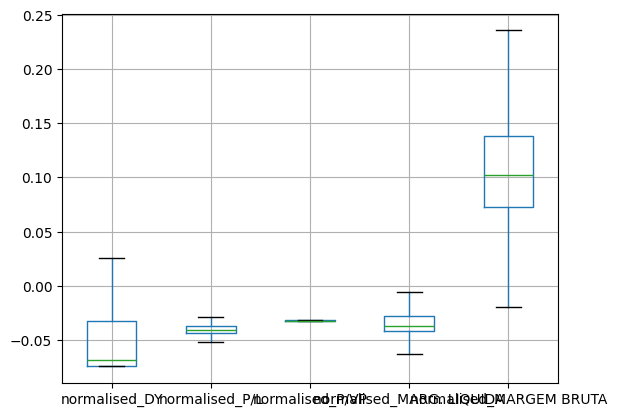

In [ ]:
desired_cols = ["DY", "P/L", "P/VP", "MARG. LIQUIDA", "MARGEM BRUTA"]
modified_cols = []

for col in desired_cols:
    new_col = "normalised_" + col
    modified_cols.append(new_col)
    
    col_vals = br_stocks[col]
    # print(col_vals, col_vals.mean(), col_vals.std())
    br_stocks[new_col] = ( col_vals - col_vals.mean() ) / col_vals.std()   

print(modified_cols)
# print(br_stocks)
br_stocks.boxplot(column=modified_cols, showfliers=False)